# Task 2

## Importing Data

In [1]:
# Basic setup
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    f1_score, 
    roc_auc_score, 
    roc_curve,
    accuracy_score
)

# Misc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from the last notebook

df = pd.read_csv('../data/Customer_Churn.csv')

# Quick check
print("Shape:", df.shape)
print(df.dtypes)
df.head()

Shape: (962, 11)
ChurnStatus                      int64
Age_scaled                     float64
AvgSpend_scaled                float64
TotalSpend_scaled              float64
LoginFrequency_scaled          float64
ResolutionRate_scaled          float64
IncomeLevel_Low                   bool
IncomeLevel_Medium                bool
ServiceUsage_Online Banking       bool
ServiceUsage_Website              bool
Interacted                       int64
dtype: object


,ChurnStatus,Age_scaled,AvgSpend_scaled,TotalSpend_scaled,LoginFrequency_scaled,ResolutionRate_scaled,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,Interacted
0,0,1.227722,2.431016,-1.236035,0.577540,1.511436,True,False,False,False,1
1,1,1.424097,-0.428836,0.332187,-1.495303,1.511436,True,False,False,True,1
2,0,-1.652454,0.489671,0.547898,-1.638257,1.511436,True,False,False,True,1
3,0,-1.456078,-0.979062,-0.541601,-1.709735,0.338854,True,False,False,True,1
4,0,-1.456078,-0.002635,0.961836,1.077881,-0.833727,False,True,False,True,0


In [3]:
# Split into features and target
X = df.drop(columns=['ChurnStatus'])
y = df['ChurnStatus']

print(y.value_counts(normalize=True))

ChurnStatus
0    0.794179
1    0.205821
Name: proportion, dtype: float64


In [4]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:")
print(y_train_res.value_counts())

After SMOTE:
ChurnStatus
0    611
1    611
Name: count, dtype: int64


In [5]:
print(y_train_res.value_counts(normalize=True))

ChurnStatus
0    0.5
1    0.5
Name: proportion, dtype: float64


## Testing and Evaluating Models

### 1 - Logistic Regression

In [6]:
# Create model
logreg = LogisticRegression(max_iter=1000,
                            solver='liblinear')

In [7]:
# Train model
logreg.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, solver='liblinear')

In [8]:
# Run model on test data
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

In [9]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.56      0.66       153
           1       0.22      0.47      0.30        40

    accuracy                           0.54       193
   macro avg       0.51      0.52      0.48       193
weighted avg       0.68      0.54      0.58       193

Confusion Matrix:
 [[85 68]
 [21 19]]
F1 Score: 0.299
ROC-AUC Score: 0.482
Accuracy Score: 0.539


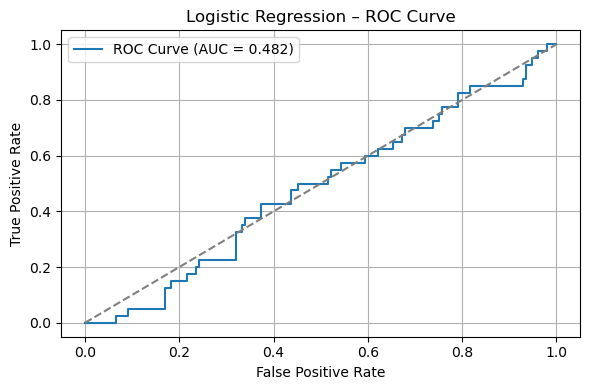

In [10]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression – ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2 - Random Forest

In [12]:
# Create the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
# Train the model
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [14]:
# Run model on test data
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [16]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("F1 Score:", round(f1_score(y_test, y_pred_rf), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_rf), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_rf), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       153
           1       0.30      0.25      0.27        40

    accuracy                           0.73       193
   macro avg       0.56      0.55      0.55       193
weighted avg       0.71      0.73      0.72       193

Confusion Matrix:
 [[130  23]
 [ 30  10]]
F1 Score: 0.274
ROC-AUC Score: 0.617
Accuracy Score: 0.725


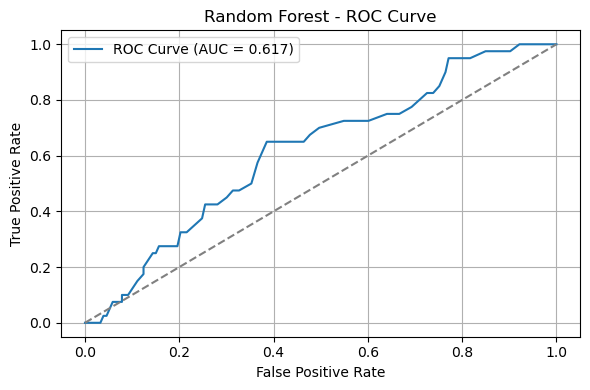

In [60]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning

##### RF1

In [18]:
# Define parameters and create model
rf_RF1 = RandomForestClassifier(n_estimators=100,
                                random_state=42)

In [20]:
# Train model
rf_RF1.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [21]:
# Predict
y_pred_RF1 = rf_RF1.predict_proba(X_test)[:, 1]
y_pred_class_RF1 = (y_pred_RF1 >= 0.3).astype(int)

In [22]:
# Evaluate
print("Results for RF1\n")
print("Accuracy:", accuracy_score(y_test, y_pred_class_RF1))
print("F1 Score:", f1_score(y_test, y_pred_class_RF1))
print("ROC AUC:", roc_auc_score(y_test, y_pred_RF1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_RF1))

Results for RF1

Accuracy: 0.5077720207253886
F1 Score: 0.3790849673202614
ROC AUC: 0.6165849673202615
Confusion Matrix:
 [[69 84]
 [11 29]]


##### RF2

In [23]:
# Define parameters and create model
rf_RF2 = RandomForestClassifier(n_estimators=100,
                                random_state=42)

In [24]:
# Train model
rf_RF2.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [35]:
# Predict
y_pred_RF2 = rf_RF2.predict_proba(X_test)[:, 1]
y_pred_class_RF2 = (y_pred_RF2 >= 0.4).astype(int)

In [36]:
# Evaluate
print("Results for RF2\n")
print("Accuracy:", accuracy_score(y_test, y_pred_class_RF2))
print("F1 Score:", f1_score(y_test, y_pred_class_RF2))
print("ROC AUC:", roc_auc_score(y_test, y_pred_RF2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_RF2))

Results for RF2

Accuracy: 0.6476683937823834
F1 Score: 0.34615384615384615
ROC AUC: 0.6165849673202615
Confusion Matrix:
 [[107  46]
 [ 22  18]]


##### RF3

In [ ]:
# Define parameters and create model
rf_RF3 = RandomForestClassifier(n_estimators=100,
                                random_state=42)

In [29]:
# Train model
rf_RF3.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [37]:
# Predict
y_pred_RF3 = rf_RF3.predict_proba(X_test)[:, 1]
y_pred_class_RF3 = (y_pred_RF3 >= 0.5).astype(int)

In [38]:
# Evaluate
print("Results for RF3\n")
print("Accuracy:", accuracy_score(y_test, y_pred_class_RF3))
print("F1 Score:", f1_score(y_test, y_pred_class_RF3))
print("ROC AUC:", roc_auc_score(y_test, y_pred_RF3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_RF3))

Results for RF3

Accuracy: 0.7253886010362695
F1 Score: 0.29333333333333333
ROC AUC: 0.6165849673202615
Confusion Matrix:
 [[129  24]
 [ 29  11]]


##### RF3.5

In [33]:
rf_RF3_5 = RandomForestClassifier(n_estimators=100,
                                random_state=42)

In [34]:
# Train model
rf_RF3_5.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [39]:
# Predict
y_pred_RF3_5 = rf_RF3_5.predict_proba(X_test)[:, 1]
y_pred_class_RF3_5 = (y_pred_RF3_5 >= 0.35).astype(int)

In [40]:
# Evaluate
print("Results for RF3_5\n")
print("Accuracy:", accuracy_score(y_test, y_pred_class_RF3_5))
print("F1 Score:", f1_score(y_test, y_pred_class_RF3_5))
print("ROC AUC:", roc_auc_score(y_test, y_pred_RF3_5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_RF3_5))

Results for RF3_5

Accuracy: 0.6217616580310881
F1 Score: 0.416
ROC AUC: 0.6165849673202615
Confusion Matrix:
 [[94 59]
 [14 26]]


##### RF4

In [41]:
rf_RF4 = RandomForestClassifier(n_estimators=100,
                                class_weight='balanced',
                                random_state=42)

In [42]:
# Train model
rf_RF4.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [43]:
# Predict
y_pred_RF4 = rf_RF4.predict_proba(X_test)[:, 1]
y_pred_class_RF4 = (y_pred_RF4 >= 0.35).astype(int)

In [44]:
# Evaluate
print("Results for RF4\n")
print("Accuracy:", accuracy_score(y_test, y_pred_class_RF4))
print("F1 Score:", f1_score(y_test, y_pred_class_RF4))
print("ROC AUC:", roc_auc_score(y_test, y_pred_RF4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_RF4))

Results for RF4

Accuracy: 0.6217616580310881
F1 Score: 0.416
ROC AUC: 0.6165849673202615
Confusion Matrix:
 [[94 59]
 [14 26]]


##### RF5

In [45]:
rf_RF5 = RandomForestClassifier(n_estimators=300,
                                max_depth=10,
                                random_state=42)

In [46]:
# Train model
rf_RF5.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [47]:
# Predict
y_pred_RF5 = rf_RF5.predict_proba(X_test)[:, 1]
y_pred_class_RF5 = (y_pred_RF5 >= 0.35).astype(int)

In [48]:
# Evaluate
print("Results for RF5\n")
print("Accuracy:", accuracy_score(y_test, y_pred_class_RF5))
print("F1 Score:", f1_score(y_test, y_pred_class_RF5))
print("ROC AUC:", roc_auc_score(y_test, y_pred_RF5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_RF5))

Results for RF5

Accuracy: 0.5492227979274611
F1 Score: 0.3916083916083916
ROC AUC: 0.636437908496732
Confusion Matrix:
 [[78 75]
 [12 28]]


##### RF6

In [50]:
rf_RF6 = RandomForestClassifier(n_estimators=300,
                                max_depth=10,
                                class_weight='balanced',
                                random_state=42)

In [51]:
# Train model
rf_RF6.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       random_state=42)

In [52]:
# Predict
y_pred_RF6 = rf_RF6.predict_proba(X_test)[:, 1]
y_pred_class_RF6 = (y_pred_RF6 >= 0.35).astype(int)

In [53]:
# Evaluate
print("Results for RF6\n")
print("Accuracy:", accuracy_score(y_test, y_pred_class_RF6))
print("F1 Score:", f1_score(y_test, y_pred_class_RF6))
print("ROC AUC:", roc_auc_score(y_test, y_pred_RF6))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_RF6))

Results for RF6

Accuracy: 0.5492227979274611
F1 Score: 0.3916083916083916
ROC AUC: 0.636437908496732
Confusion Matrix:
 [[78 75]
 [12 28]]


### 3 - XGBoost

In [54]:
# Create model
xgb_clf = XGBClassifier(use_label_encode=False,
                        eval_metric='logloss',
                        random_state=42)

In [55]:
# Train model
xgb_clf.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

In [57]:
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

In [58]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       153
           1       0.35      0.42      0.39        40

    accuracy                           0.72       193
   macro avg       0.60      0.61      0.60       193
weighted avg       0.74      0.72      0.73       193

Confusion Matrix:
 [[122  31]
 [ 23  17]]
F1 Score: 0.386
ROC-AUC Score: 0.656
Accuracy Score: 0.72


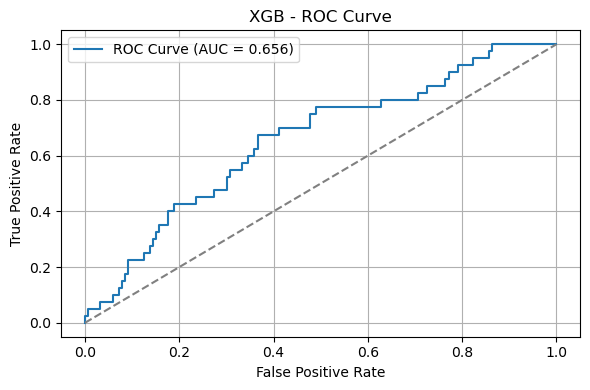

In [59]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_xgb):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB - ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning

##### XGB1

In [61]:
xgb1 = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [62]:
xgb1.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [63]:
y_prob_xgb1 = xgb1.predict_proba(X_test)[:, 1]

In [64]:
y_pred_xgb1 = (y_prob_xgb1 >= 0.3).astype(int)

In [65]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb1))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb1), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb1), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb1), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.34      0.50       153
           1       0.26      0.88      0.40        40

    accuracy                           0.45       193
   macro avg       0.58      0.61      0.45       193
weighted avg       0.78      0.45      0.48       193

Confusion Matrix:
 [[ 52 101]
 [  5  35]]
F1 Score: 0.398
ROC-AUC Score: 0.613
Accuracy Score: 0.451


##### XGB2

In [66]:
xgb2 = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [67]:
xgb2.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [68]:
y_prob_xgb2 = xgb2.predict_proba(X_test)[:, 1]

In [69]:
y_pred_xgb2 = (y_prob_xgb2 >= 0.35).astype(int)

In [70]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb2))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb2), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb2), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb2), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.46      0.59       153
           1       0.25      0.68      0.36        40

    accuracy                           0.50       193
   macro avg       0.54      0.57      0.48       193
weighted avg       0.72      0.50      0.54       193

Confusion Matrix:
 [[70 83]
 [13 27]]
F1 Score: 0.36
ROC-AUC Score: 0.613
Accuracy Score: 0.503


##### XGB3

In [71]:
xgb3 = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [72]:
xgb3.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [73]:
y_prob_xgb3 = xgb3.predict_proba(X_test)[:, 1]

In [74]:
y_pred_xgb3 = (y_prob_xgb3 >= 0.40).astype(int)

In [ ]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb3))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb3), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb3), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb3), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.52      0.64       153
           1       0.26      0.65      0.37        40

    accuracy                           0.54       193
   macro avg       0.55      0.58      0.51       193
weighted avg       0.73      0.54      0.59       193

Confusion Matrix:
 [[79 74]
 [14 26]]
F1 Score: 0.371
ROC-AUC Score: 0.613
Accuracy Score: 0.544


##### XGB3.5

In [76]:
xgb3_5 = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [77]:
xgb3_5.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [90]:
y_prob_xgb3_5 = xgb3_5.predict_proba(X_test)[:, 1]

In [101]:
y_pred_xgb3_5 = (y_prob_xgb3_5 >= 0.45).astype(int)

In [102]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb3_5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb3_5))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb3_5), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb3_5), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb3_5), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.61      0.70       153
           1       0.25      0.50      0.34        40

    accuracy                           0.59       193
   macro avg       0.54      0.56      0.52       193
weighted avg       0.71      0.59      0.63       193

Confusion Matrix:
 [[94 59]
 [20 20]]
F1 Score: 0.336
ROC-AUC Score: 0.613
Accuracy Score: 0.591


##### XGB4

In [103]:
xgb4 = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [104]:
xgb4.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [106]:
y_prob_xgb4 = xgb4.predict_proba(X_test)[:, 1]

In [107]:
y_pred_xgb4 = (y_prob_xgb4 >= 0.4).astype(int)

In [108]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb4))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb4), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb4), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb4), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       153
           1       0.30      0.40      0.34        40

    accuracy                           0.68       193
   macro avg       0.57      0.58      0.57       193
weighted avg       0.72      0.68      0.70       193

Confusion Matrix:
 [[116  37]
 [ 24  16]]
F1 Score: 0.344
ROC-AUC Score: 0.625
Accuracy Score: 0.684


##### XGB5

In [109]:
xgb5 = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [110]:
xgb5.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [111]:
y_prob_xgb5 = xgb5.predict_proba(X_test)[:, 1]

In [112]:
y_pred_xgb5 = (y_prob_xgb5 >= 0.40).astype(int)

In [113]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb5))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb5), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb5), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb5), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       153
           1       0.33      0.42      0.37        40

    accuracy                           0.70       193
   macro avg       0.59      0.60      0.59       193
weighted avg       0.73      0.70      0.72       193

Confusion Matrix:
 [[119  34]
 [ 23  17]]
F1 Score: 0.374
ROC-AUC Score: 0.625
Accuracy Score: 0.705


##### XGB6

In [114]:
xgb6 = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.01,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [115]:
xgb6.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [116]:
y_prob_xgb6 = xgb6.predict_proba(X_test)[:, 1]

In [117]:
y_pred_xgb6 = (y_prob_xgb6 >= 0.4).astype(int)

In [118]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb6))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb6))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb6), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb6), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb6), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.52      0.64       153
           1       0.26      0.65      0.37        40

    accuracy                           0.54       193
   macro avg       0.55      0.58      0.51       193
weighted avg       0.73      0.54      0.59       193

Confusion Matrix:
 [[79 74]
 [14 26]]
F1 Score: 0.371
ROC-AUC Score: 0.596
Accuracy Score: 0.544


##### XGB7

In [119]:
xgb7 = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.2,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [120]:
xgb7.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [121]:
y_prob_xgb7 = xgb7.predict_proba(X_test)[:, 1]

In [122]:
y_pred_xgb7 = (y_prob_xgb7 >= 0.4).astype(int)

In [123]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb7))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb7))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb7), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb7), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb7), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       153
           1       0.33      0.45      0.38        40

    accuracy                           0.70       193
   macro avg       0.59      0.61      0.59       193
weighted avg       0.74      0.70      0.71       193

Confusion Matrix:
 [[117  36]
 [ 22  18]]
F1 Score: 0.383
ROC-AUC Score: 0.638
Accuracy Score: 0.699


##### XGB8

In [124]:
xgb8 = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [125]:
xgb8.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [126]:
y_prob_xgb8 = xgb8.predict_proba(X_test)[:, 1]

In [127]:
y_pred_xgb8 = (y_prob_xgb8 >= 0.4).astype(int)

In [128]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb8))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb8))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb8), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb8), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb8), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       153
           1       0.33      0.53      0.41        40

    accuracy                           0.68       193
   macro avg       0.59      0.63      0.60       193
weighted avg       0.75      0.68      0.71       193

Confusion Matrix:
 [[111  42]
 [ 19  21]]
F1 Score: 0.408
ROC-AUC Score: 0.639
Accuracy Score: 0.684


##### XGB9

In [129]:
xgb9 = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [130]:
xgb9.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [131]:
y_prob_xgb9 = xgb9.predict_proba(X_test)[:, 1]

In [132]:
y_pred_xgb9 = (y_prob_xgb9 >= 0.4).astype(int)

In [133]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb9))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb9))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb9), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb9), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb9), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.65      0.73       153
           1       0.29      0.55      0.38        40

    accuracy                           0.63       193
   macro avg       0.57      0.60      0.56       193
weighted avg       0.73      0.63      0.66       193

Confusion Matrix:
 [[99 54]
 [18 22]]
F1 Score: 0.379
ROC-AUC Score: 0.632
Accuracy Score: 0.627


##### XGB10

In [134]:
xgb10 = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.2,
    scale_pos_weight=2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [135]:
xgb10.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [136]:
y_prob_xgb10 = xgb10.predict_proba(X_test)[:, 1]

In [137]:
y_pred_xgb10 = (y_prob_xgb10 >= 0.4).astype(int)

In [138]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb10))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb10))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb10), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb10), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb10), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       153
           1       0.31      0.47      0.38        40

    accuracy                           0.67       193
   macro avg       0.58      0.60      0.58       193
weighted avg       0.73      0.67      0.70       193

Confusion Matrix:
 [[111  42]
 [ 21  19]]
F1 Score: 0.376
ROC-AUC Score: 0.624
Accuracy Score: 0.674


#### Optimal threshold for F1 Score

In [259]:
probs = xgb8.predict_proba(X_test)[:, 1]  # probabilities for class 1

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, probs > t) for t in thresholds]

best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1 score: {best_f1:.3f}")

Best threshold: 0.38
Best F1 score: 0.423


In [236]:
xgb11 = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.1,
    reg_lambda = 1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [237]:
xgb11.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [238]:
y_prob_xgb11 = xgb11.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_xgb11 = (y_prob_xgb11 >= 0.38).astype(int)

In [242]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb11))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb11))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb11), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb11), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb11), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       153
           1       0.31      0.53      0.39        40

    accuracy                           0.66       193
   macro avg       0.58      0.61      0.58       193
weighted avg       0.74      0.66      0.69       193

Confusion Matrix:
 [[107  46]
 [ 19  21]]
F1 Score: 0.393
ROC-AUC Score: 0.627
Accuracy Score: 0.663


### XGB

In [256]:
xgb_final = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.1,
    reg_lambda = 1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [257]:
xgb_final.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [258]:
y_prob_xgb_final = xgb_final.predict_proba(X_test)[:, 1]

In [266]:
y_pred_xgb_final = (y_prob_xgb_final >= 0.38).astype(int)

In [267]:
# Evaluate performance across using 'all' metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_final))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb_final), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb_final), 3))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb_final), 3))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       153
           1       0.31      0.50      0.38        40

    accuracy                           0.66       193
   macro avg       0.58      0.60      0.57       193
weighted avg       0.73      0.66      0.69       193

Confusion Matrix:
 [[108  45]
 [ 20  20]]
F1 Score: 0.381
ROC-AUC Score: 0.628
Accuracy Score: 0.663
